In [1]:
t1="2019-08-11T00:00:00"
t2="2019-09-11T00:00:00"
nscw=1

In [24]:
%matplotlib notebook
import matplotlib.pylab as plt


import numpy as np
import importlib
from astroquery.simbad import Simbad
from astropy import coordinates as coord

In [7]:
result_table = Simbad.query_object("Crab", wildcard=True)
crab_coord = coord.SkyCoord(result_table['RA'][0], result_table['DEC'][0], unit=("hourangle", "deg"))

In [8]:
import requests

r=requests.get("http://cdcihn/timesystem/api/v1.0/scwlist/any/{t1}/{t2}".format(
                t1=t1,
                t2=t2,
            ),
              params=dict(
                  ra=crab_coord.ra.deg,
                  dec=crab_coord.dec.deg,
                  radius=10,
              ))

scw_pick = [s+".000" for s in r.json() if s.endswith("0010")][-nscw:]

scw_list_str = ",".join(scw_pick)
scw_list_str

'213200530010.000'

In [9]:
import oda_api.api
import importlib
importlib.reload(oda_api)

disp = oda_api.api.DispatcherAPI(host="http://cdcihn/staging-1.2/dispatcher")

#disp.get_instrument_description("isgri")



213200530010.000
waiting for remote response, please wait run_analysis http://cdcihn/staging-1.2/dispatcher
the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=5638093361770678674  74  

query done succesfully!


<IPython.core.display.Javascript object>


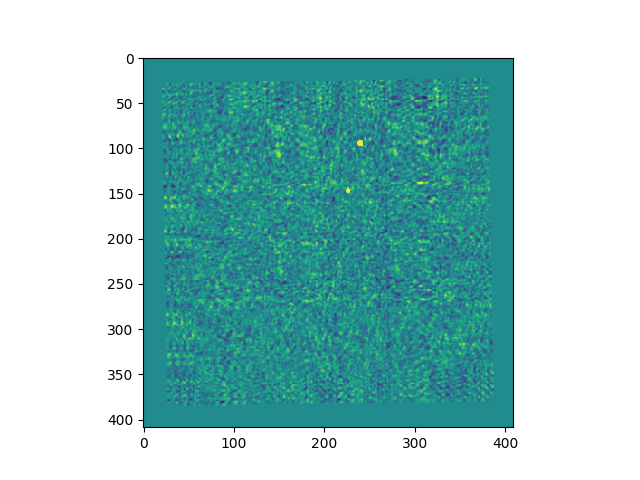

213200530010.000
waiting for remote response, please wait run_analysis http://cdcihn/staging-1.2/dispatcher
the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=352976329052969038  38  

query done succesfully!
213200530010.000
waiting for remote response, please wait run_analysis http://cdcihn/staging-1.2/dispatcher
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=6380339123826845682  82  

query done succesfully!
213200530010.000
waiting for remote response, please wait run_analysis http://cdcihn/staging-1.2/dispatcher
the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=1669847117890352788  88  

query done succesfully!
213200530010.000
waiting for remote response, please wait run_analysis http://cdcihn/staging-1.2/dispatcher
the job has been submitted on the remote server
 / the job is working remotel

In [10]:
crab_by_osa={}


#for osa_version in "OSA11.0", "OSA10.2":
for osa_version in ["OSA11.0"]:
    crab_by_lt={}
    crab_by_osa[osa_version]=crab_by_lt

    for c_emin in np.linspace(20,35,5):

        image = disp.get_product(instrument="isgri", 
                         product="isgri_image", 
                         product_type="Real", 
                         osa_version=osa_version,
                         E1_keV=np.round(c_emin),
                         E2_keV=80.0,
                         scw_list=scw_list_str)

        crab=image.dispatcher_catalog_1.table[np.argmax(image.dispatcher_catalog_1.table['significance'])]

        d=image.mosaic_image_0.data_unit[1].data


        img=np.array(d.data)

        m_bkg=img<10
        m_bkg&=img!=0

        img_std = np.std(img[m_bkg])

        img[np.array(img)>img_std*5]=img_std*5

        plt.imshow(img)

        crab_by_lt[c_emin]=dict([(n, crab[n]) for n in crab.colnames])
        crab_by_lt[c_emin]['imgstd']=img_std


In [11]:
for lt, c in crab_by_lt.items():
    print(lt, c['significance'],c['significance']/c['imgstd'])

20.0 177.3506622314453 83.73319477282274
23.75 176.1190185546875 86.69188578166926
27.5 169.4215087890625 103.11434811062435
31.25 155.61753845214844 98.51406669978606
35.0 134.37615966796875 88.3294931520149


In [12]:
spectrum = disp.get_product(instrument="isgri", 
                 product="isgri_spectrum", 
                 product_type="Real", 
                 osa_version='OSA11.0',
                 E1_keV=25.0,
                 E2_keV=80.0,
                 scw_list=scw_list_str)

213200530010.000
waiting for remote response, please wait run_analysis http://cdcihn/staging-1.2/dispatcher
the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=8967203221299951960  60  

query done succesfully!


In [35]:
crab_specprod=[l for l in spectrum._p_list if l.meta_data['src_name'] == "Crab"]    

crab_specprod[0].write_fits_file("isgri_spectrum_Crab.fits")
crab_specprod[2].write_fits_file("isgri_rmf_Crab.fits")

In [14]:

from IPython.display import Image
from IPython.display import display 
import xspec



**-25.00 400.-**
[1.9027153364523735, 0.019027153364523736, -3.0, -2.0, 9.0, 10.0] [2.765683252687361, 0.02765683252687361, -3.0, -2.0, 9.0, 10.0]


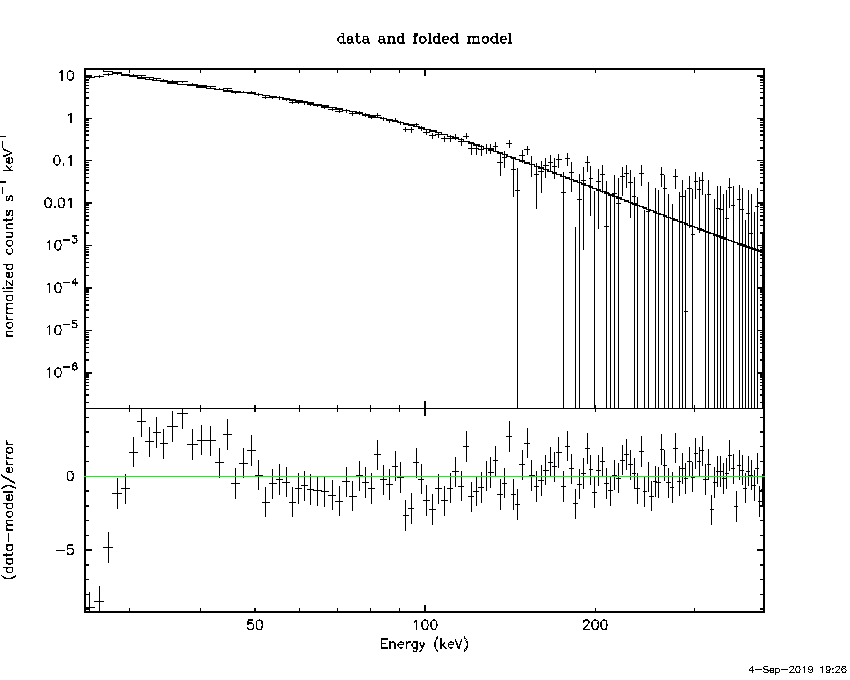

**-26.11 400.-**
[1.9895631898989983, 0.019895631898989984, -3.0, -2.0, 9.0, 10.0] [2.5367973853238803, 0.025367973853238805, -3.0, -2.0, 9.0, 10.0]


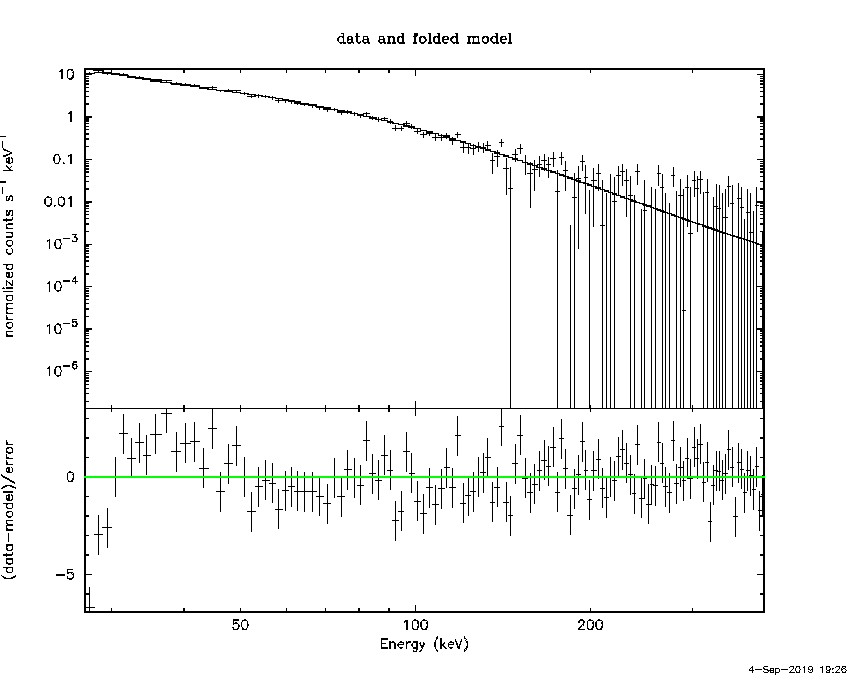

**-27.22 400.-**
[2.033329636733144, 0.02033329636733144, -3.0, -2.0, 9.0, 10.0] [2.4313091481979847, 0.024313091481979847, -3.0, -2.0, 9.0, 10.0]


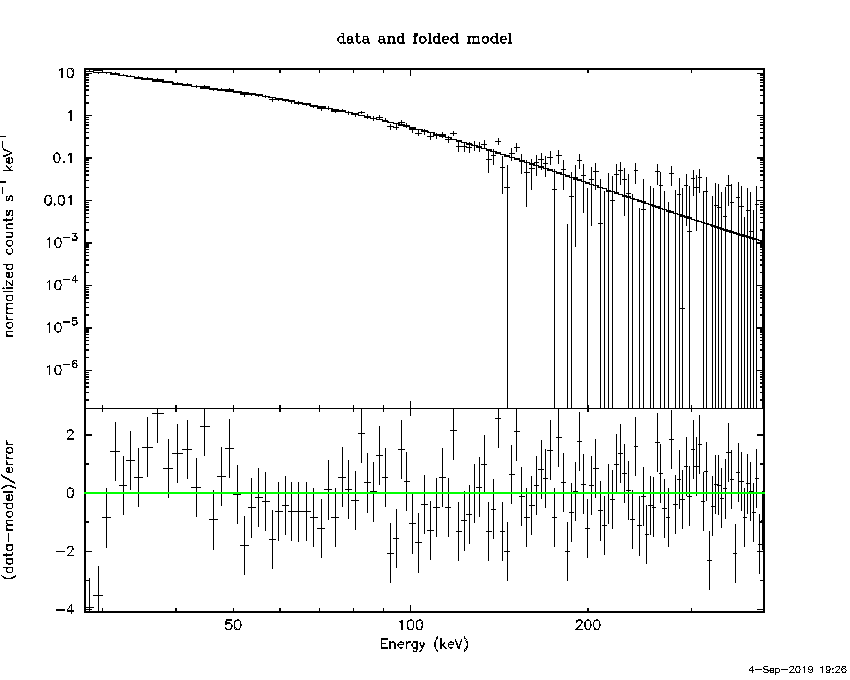

**-28.33 400.-**
[2.062436559161499, 0.02062436559161499, -3.0, -2.0, 9.0, 10.0] [2.365137065722764, 0.02365137065722764, -3.0, -2.0, 9.0, 10.0]


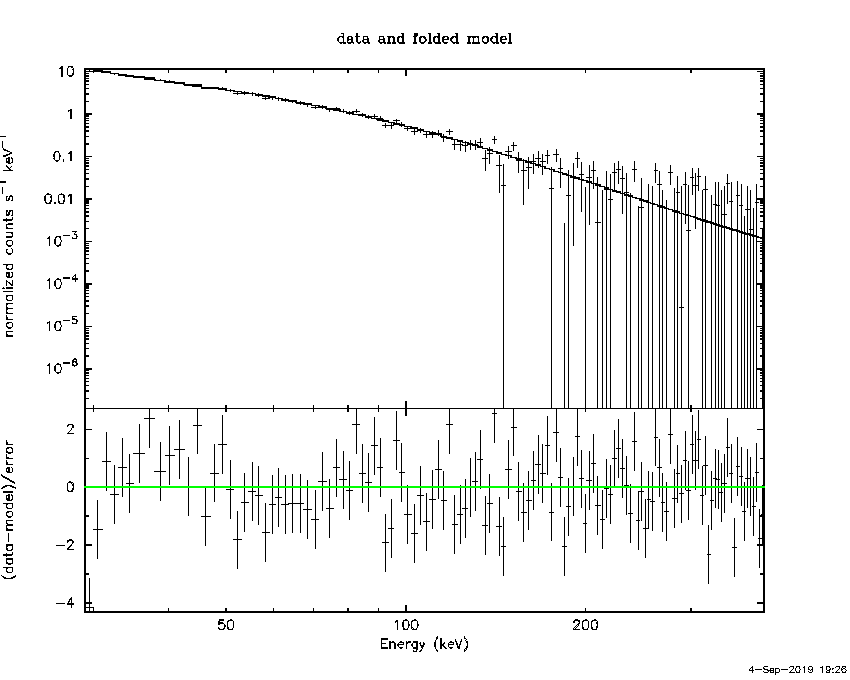

**-29.44 400.-**
[2.097128489748462, 0.020971284897484618, -3.0, -2.0, 9.0, 10.0] [2.2906122068496804, 0.022906122068496803, -3.0, -2.0, 9.0, 10.0]


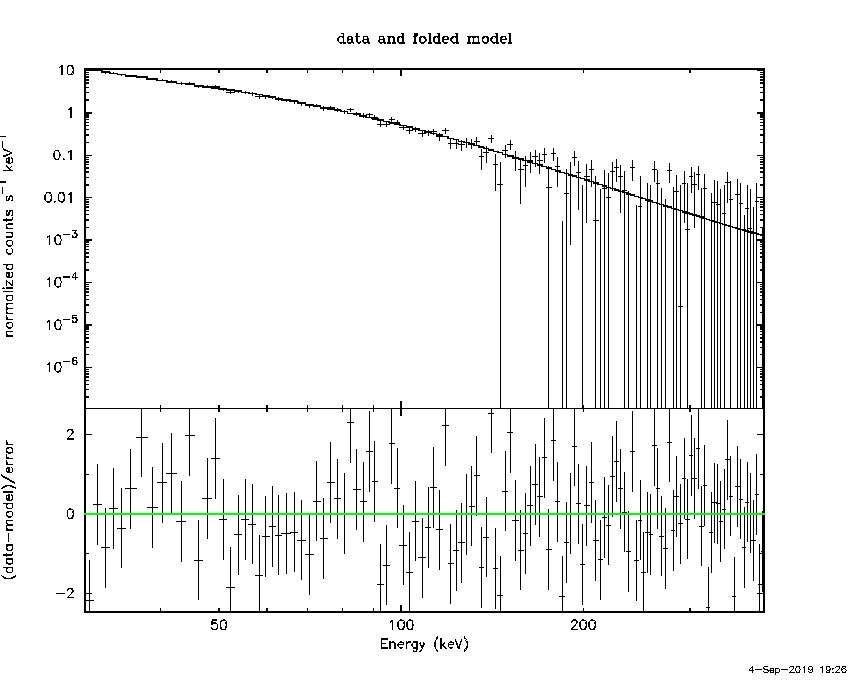

**-30.56 400.-**
[2.1172522147390165, 0.021172522147390165, -3.0, -2.0, 9.0, 10.0] [2.249723530323165, 0.02249723530323165, -3.0, -2.0, 9.0, 10.0]


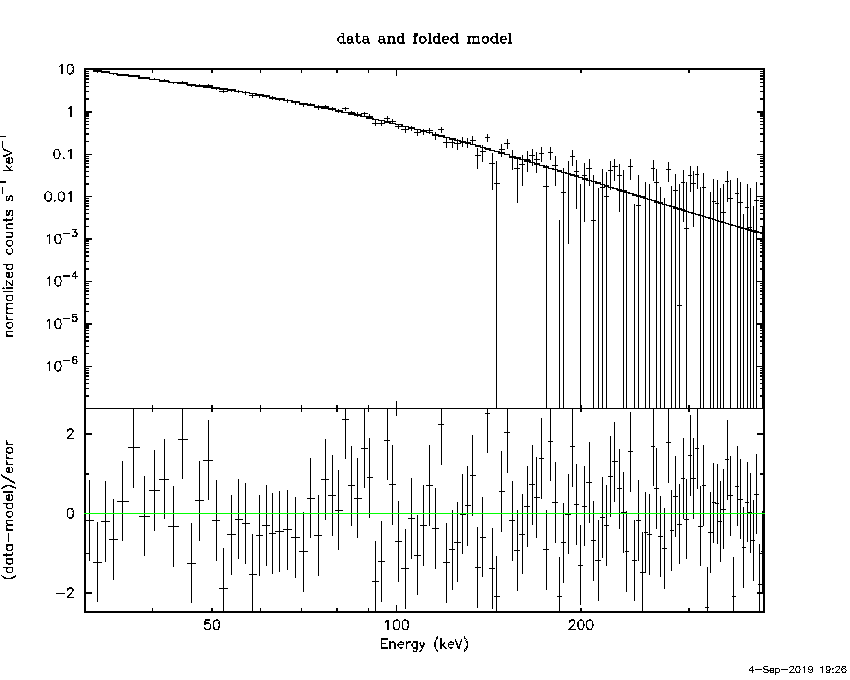

**-31.67 400.-**
[2.118894628989307, 0.021188946289893068, -3.0, -2.0, 9.0, 10.0] [2.246541490369414, 0.02246541490369414, -3.0, -2.0, 9.0, 10.0]


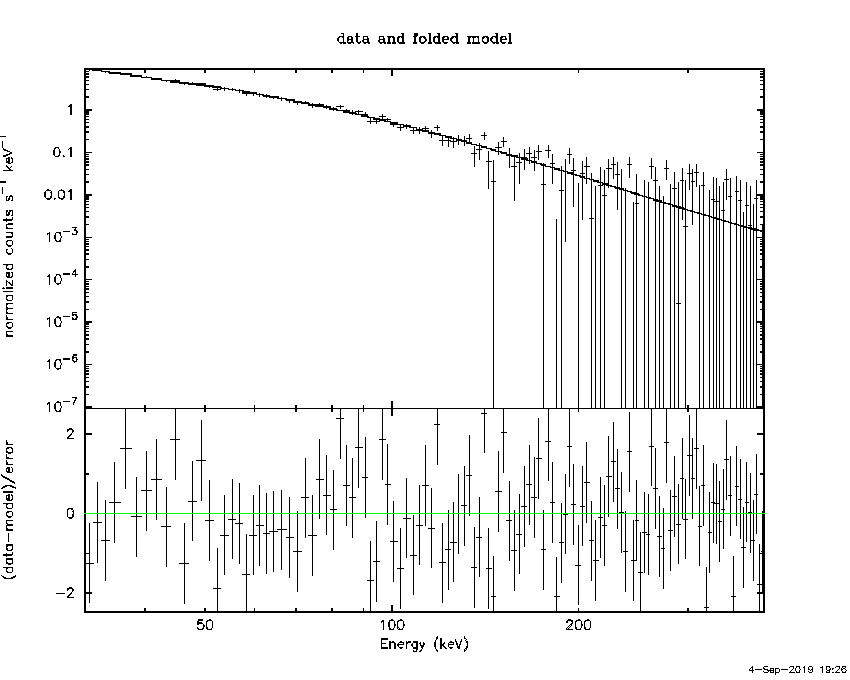

**-32.78 400.-**
[2.131998348249899, 0.02131998348249899, -3.0, -2.0, 9.0, 10.0] [2.2223445068963996, 0.022223445068963996, -3.0, -2.0, 9.0, 10.0]


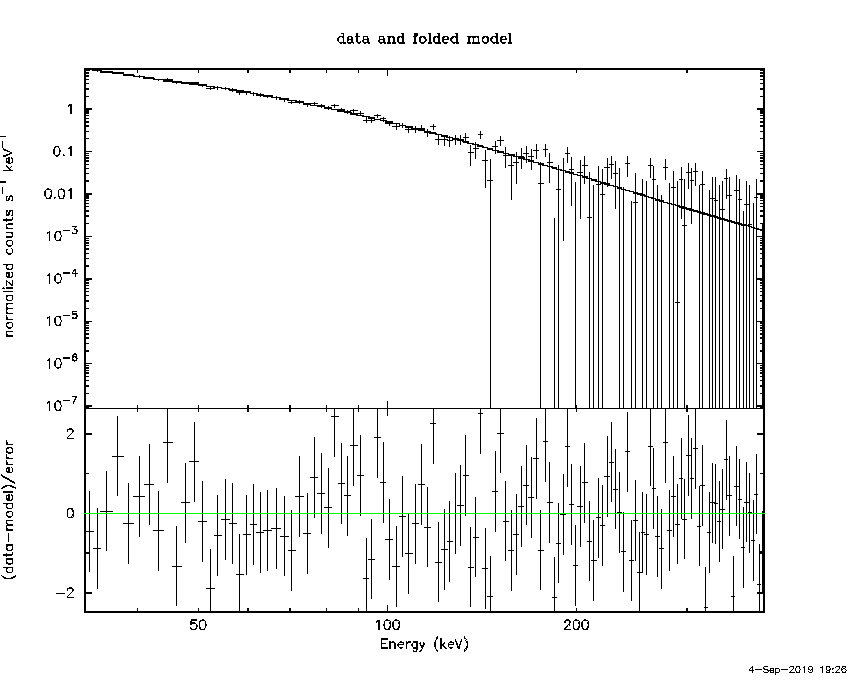

**-33.89 400.-**
[2.1370044465433393, 0.021370044465433394, -3.0, -2.0, 9.0, 10.0] [2.213561086366735, 0.02213561086366735, -3.0, -2.0, 9.0, 10.0]


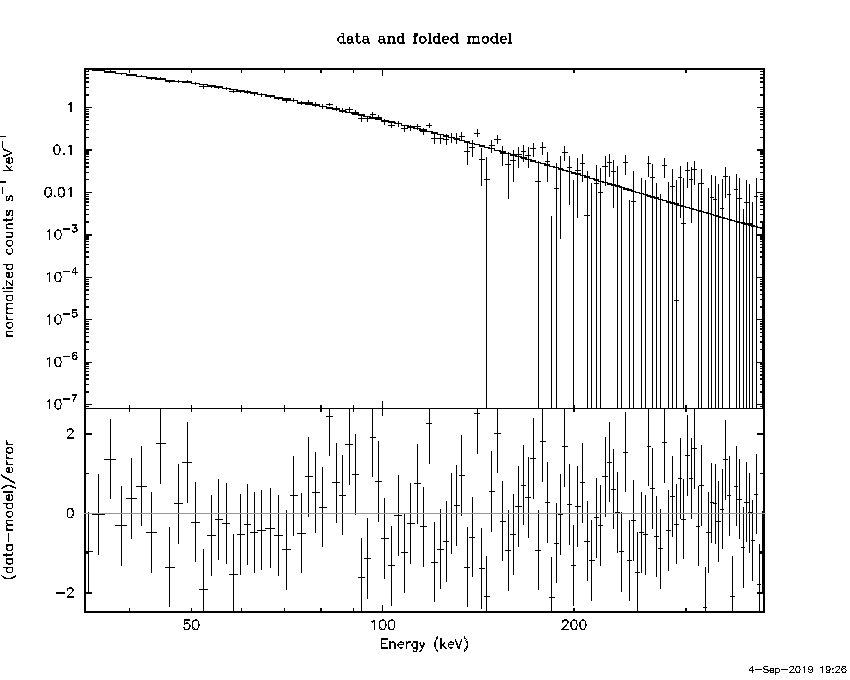

**-35.00 400.-**
[2.148144093560886, 0.02148144093560886, -3.0, -2.0, 9.0, 10.0] [2.19500157199372, 0.0219500157199372, -3.0, -2.0, 9.0, 10.0]


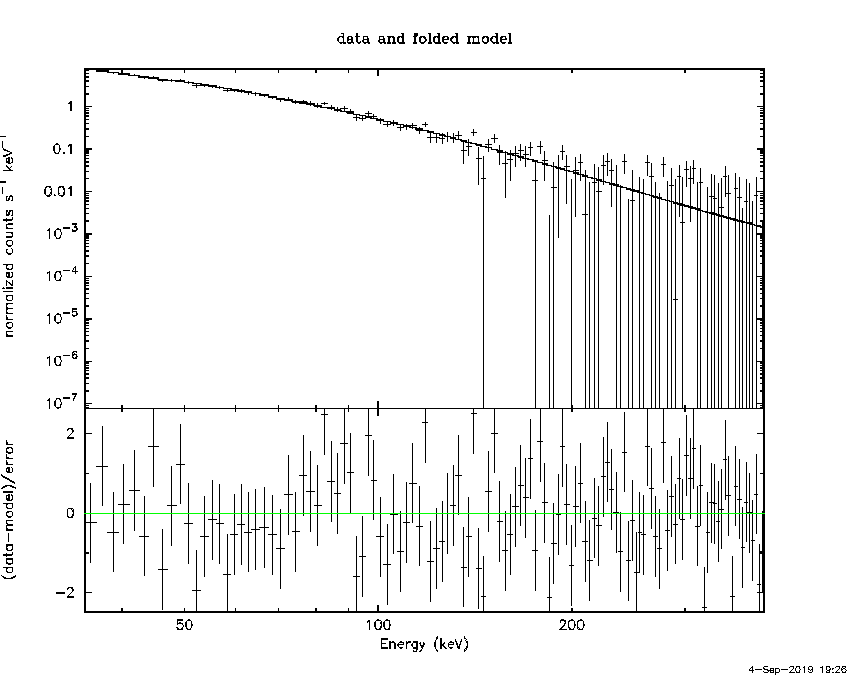

In [36]:
importlib.reload(xspec)

fit_by_lt = {}

for c_emin in np.linspace(25,35,10):
    xspec.AllData.clear()

    s = xspec.Spectrum("isgri_spectrum_Crab.fits")   
    s.response="isgri_rmf_Crab.fits"
    
    ig="**-%.2f 400.-**"%c_emin
    
    print(ig)
    s.ignore(ig)

    if False:
        m = xspec.Model("grbm")
        m.grbm.tem=600
        m.grbm.tem.frozen=True

        xspec.Fit.perform()

        print(m.grbm.alpha.values,m.grbm.beta.values, xspec.Fit.statistic/xspec.Fit.dof)
    else:
        m = xspec.Model("bknpo")
        m.bknpower.BreakE=100
        m.bknpower.BreakE.frozen=True

        xspec.Fit.perform()

        print(m.bknpower.PhoIndx1.values,m.bknpower.PhoIndx2.values, )
        
        fit_by_lt[c_emin]=dict(
            chi2_red=xspec.Fit.statistic/xspec.Fit.dof,
            PhoIndx1=m.bknpower.PhoIndx1.values,
            PhoIndx2=m.bknpower.PhoIndx2.values,
        )
        
    
    xspec.Plot.device="/png"
    #xspec.Plot.addCommand("setplot en")
    xspec.Plot.xAxis="keV"
    xspec.Plot("ldata del")
    xspec.Plot.device="/png"

    _=display(Image(filename="pgplot.png_2",format="png"))



In [37]:
fit_by_lt

{25.0: {'chi2_red': 3.1379406275460244,
  'PhoIndx1': [1.9027153364523735,
   0.019027153364523736,
   -3.0,
   -2.0,
   9.0,
   10.0],
  'PhoIndx2': [2.765683252687361, 0.02765683252687361, -3.0, -2.0, 9.0, 10.0]},
 26.11111111111111: {'chi2_red': 1.804344756148874,
  'PhoIndx1': [1.9895631898989983,
   0.019895631898989984,
   -3.0,
   -2.0,
   9.0,
   10.0],
  'PhoIndx2': [2.5367973853238803,
   0.025367973853238805,
   -3.0,
   -2.0,
   9.0,
   10.0]},
 27.22222222222222: {'chi2_red': 1.4193034847024502,
  'PhoIndx1': [2.033329636733144, 0.02033329636733144, -3.0, -2.0, 9.0, 10.0],
  'PhoIndx2': [2.4313091481979847,
   0.024313091481979847,
   -3.0,
   -2.0,
   9.0,
   10.0]},
 28.333333333333332: {'chi2_red': 1.289207434512808,
  'PhoIndx1': [2.062436559161499, 0.02062436559161499, -3.0, -2.0, 9.0, 10.0],
  'PhoIndx2': [2.365137065722764, 0.02365137065722764, -3.0, -2.0, 9.0, 10.0]},
 29.444444444444443: {'chi2_red': 1.1371561192221442,
  'PhoIndx1': [2.097128489748462, 0.02097128

In [38]:

for lt,d in fit_by_lt.items():
    print(lt, d['chi2_red'])
    
good_lt = min([p for p in fit_by_lt.items() if p[1]['chi2_red']<1.2], key=lambda x:x)

good_lt

25.0 3.1379406275460244
26.11111111111111 1.804344756148874
27.22222222222222 1.4193034847024502
28.333333333333332 1.289207434512808
29.444444444444443 1.1371561192221442
30.555555555555557 1.1005316812612296
31.666666666666668 1.1091355199143484
32.77777777777778 1.1028592465362819
33.888888888888886 1.1098510147935645
35.0 1.1096994970873273


(29.444444444444443,
 {'chi2_red': 1.1371561192221442,
  'PhoIndx1': [2.097128489748462, 0.020971284897484618, -3.0, -2.0, 9.0, 10.0],
  'PhoIndx2': [2.2906122068496804,
   0.022906122068496803,
   -3.0,
   -2.0,
   9.0,
   10.0]})

In [39]:
def run_local():
    pass

In [19]:
def run_cdci():
    pass

In [20]:
def run_ddosa():
    pass

In [21]:
summary={
    'status': 'OK',
    'emin_good': good_lt,
}

In [22]:
summary=summary
fit_results=fit_by_lt